# Interpolation Filters

In [2]:

# Halfband filter design for interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
# coefficients get discretized to nr bits in +- 0.5
bits=18

fir_0 Passband ripple:	0.0001363848103558379 dB
fir_0 Stopband attenuation:	95.88024782526105 dB
fir_1 Passband ripple:	0.00014910445731079655 dB
fir_1 Stopband attenuation:	95.24393859729784 dB
fir_2 Passband ripple:	0.00018290909101797173 dB
fir_2 Stopband attenuation:	94.21756301828336 dB
fir_3 Passband ripple:	0.0002786985245119621 dB
fir_3 Stopband attenuation:	89.8734534001618 dB


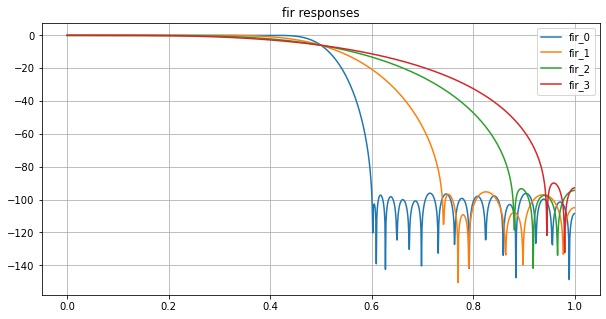

In [33]:
# fir_0
n_0=59
bands_0 = np.array([0., .2, .3, .5])
h_0 = signal.remez(n_0, bands_0, [1,0], [1,1])
h_0[abs(h_0) <= 1e-5] = 0   # force hard zeros
h_0 = np.round(h_0 * 2 ** (bits + 1))     # discretize
h_0 = h_0 * 2 ** -(bits + 1)
(w,H_0) = signal.freqz(h_0, 1, 1000, fs=2)
plt.figure(0,(10,5))
plt.plot(w, 20 * np.log10(abs(H_0)), label='fir_0')
print(f'fir_0 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_0[:400]))))} dB')
print(f'fir_0 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_0[600:]))))} dB')

# fir_1
n_1=23
bands_1 = np.array([0., .13, .37, .5])
h_1 = signal.remez(n_1, bands_1, [1,0], [1,1])
h_1[abs(h_1) <= 1e-5] = 0
h_1 = np.round(h_1 * 2 ** (bits + 1))     # discretize
h_1 = h_1 * 2 ** -(bits + 1)
(w,H_1) = signal.freqz(h_1, 1, 1000, fs=2)
plt.plot(w, 20 * np.log10(abs(H_1)), label='fir_1')
print(f'fir_1 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_1[:200]))))} dB')
print(f'fir_1 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_1[800:]))))} dB')

# fir_2
n_2=11
bands_2 = np.array([0., .061, .43885, .5])
h_2 = signal.remez(n_2, bands_2, [1,0], [1,1])
h_2[abs(h_2) <= 1e-5] = 0
h_2 = np.round(h_2 * 2 ** (bits + 1))     # discretize
h_2 = h_2 * 2 ** -(bits + 1)
(w,H_2) = signal.freqz(h_2, 1, 1000, fs=2)
plt.plot(w, 20 * np.log10(abs(H_2)), label='fir_2')
print(f'fir_2 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_2[:100]))))} dB')
print(f'fir_2 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_2[900:]))))} dB')

# fir_3
n_3=7
bands_3 = np.array([0., .03, .4706, .5])
h_3 = signal.remez(n_3, bands_3, [1,0], [1,1])
h_3[abs(h_3) <= 1e-5] = 0
h_3 = np.round(h_3 * 2 ** (bits + 1))     # discretize
h_3 = h_3 * 2 ** -(bits + 1)
(w,H_3) = signal.freqz(h_3, 1, 1000, fs=2)
plt.plot(w, 20 * np.log10(abs(H_3)), label='fir_3')
plt.title('fir responses')
print(f'fir_3 Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_3[:50]))))} dB')
print(f'fir_3 Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_3[950:]))))} dB')

plt.grid()
plt.legend()

Passband ripple:	167.7713257184956 dB
Stopband attenuation:	89.87354387424955 dB


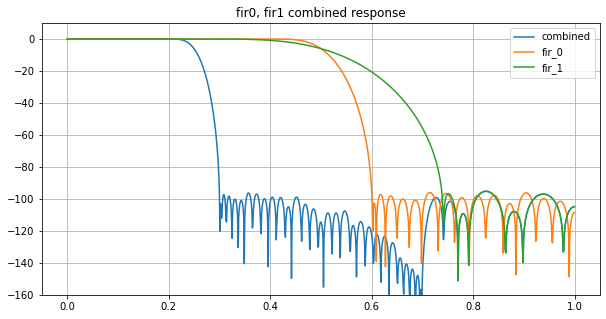

In [34]:
# 0, 1 combined
H_01 = H_1 * np.append(H_0[::2] ,H_0[::-2])
H_012 = H_2 * np.append(H_01[::2] ,H_01[::-2])
plt.figure(0,(10,5))
plt.title('fir0, fir1 combined response')
plt.plot(w, 20 * np.log10(abs(H_01)), label='combined')
plt.plot(w, 20 * np.log10(abs(H_0)), label='fir_0')
plt.plot(w, 20 * np.log10(abs(H_1)), label='fir_1')
plt.ylim(-160,10)
plt.legend()
plt.grid()
print(f'Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_0123[:200]))))} dB')
print(f'Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_0123[300:]))))} dB')

Passband ripple:	0.00042623305317372826 dB
Stopband attenuation:	89.87348345739767 dB


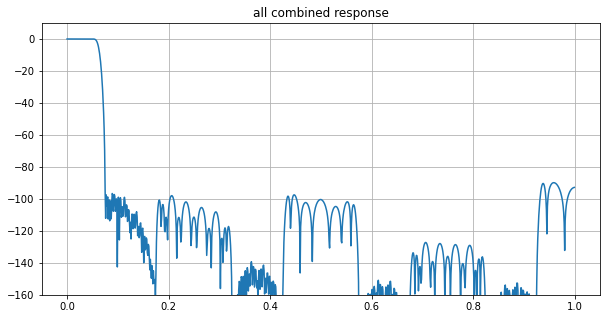

In [35]:
# all combined
H_01 = H_1 * np.append(H_0[::2] ,H_0[::-2])
H_012 = H_2 * np.append(H_01[::2] ,H_01[::-2])
H_0123 = H_3 * np.append(H_012[::2] ,H_012[::-2])
plt.figure(0,(10,5))
plt.title('all combined response')
plt.plot(w, 20 * np.log10(abs(H_0123)))
plt.ylim(-160,10)
plt.grid()
print(f'Passband ripple:\t{np.max(abs(20 * np.log10(abs(H_0123[:50]))))} dB')
print(f'Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_0123[100:]))))} dB')


/home/norman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


Passband droop r=2:	0.9283667175927957	-0.6456087521915987 dB
Passband droop r=3:	0.915712752611665	-0.7648147519679465 dB
Passband droop r=4:	0.9113274380392576	-0.8065110778032818 dB
Passband droop r=5:	0.9093052528655019	-0.8258060015488757 dB
Passband droop r=6:	0.9082087885380314	-0.8362859968379346 dB
Passband droop r=7:	0.9075483367563282	-0.8426046960298175 dB
Passband droop r=8:	0.9071199523184061	-0.8467056108272784 dB
Passband droop r=9:	0.9068263779907509	-0.849517109922085 dB
Passband droop r=10:	0.906616448173984	-0.8515281214654469 dB


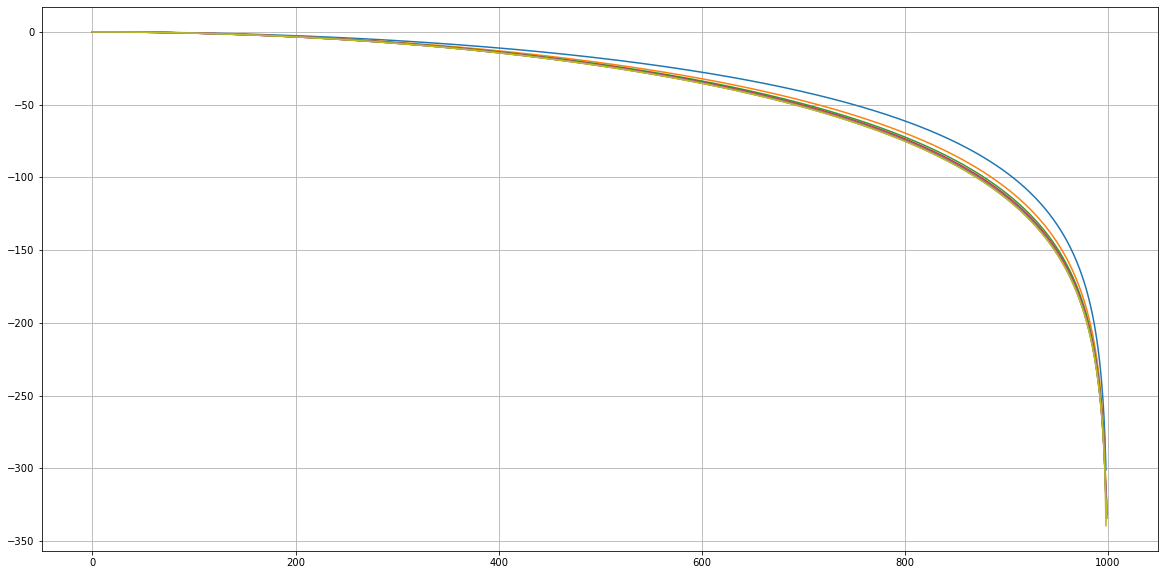

In [83]:
# cic mainlobe droop for different ratechanges
n = 6
plt.figure(0,(20,10))
for rm in range(2,11):
    h_cic = 1
    for i in range(n):
        h_cic = np.convolve(np.ones(rm), h_cic) * rm**-1
        (w, H_cic) = signal.freqz(h_cic, 1, rm * 500, fs=2)
    plt.plot(20 * np.log10(abs(H_cic[:1000])), label='fir_{rm}')
    print(f'Passband droop r={rm}:\t{abs(H_cic[100])}\t{20 * np.log10(abs(H_cic[100]))} dB')
plt.grid()

Stopband attenuation:	89.73876715944733 dB


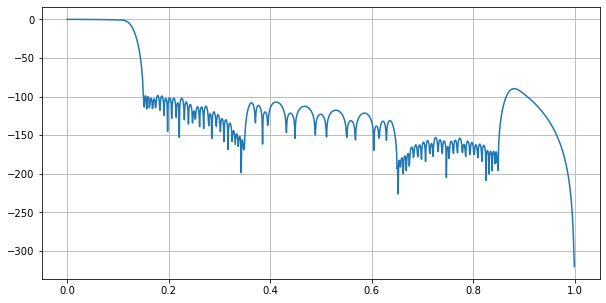

In [70]:
# fir 1 and 2 and cic ratechange of 2 (worst case)
n = 6
r = 2
h_cic = 1
for i in range(n):
    h_cic = np.convolve(np.ones(r), h_cic) * r**-1
(w, H_cic) = signal.freqz(h_cic, 1, 1000, fs=2)
H_01cic = H_cic * np.append(H_01[::2] ,[H_01[::-2]]) + 10**-16
plt.figure(0,(10,5))
plt.plot(w, 20 * np.log10(abs(H_01cic)), label='cic')
plt.grid()
print(f'Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_01cic[200:]))))} dB')

Stopband attenuation:	106.87688819461458 dB
Passband droop:	0.906597108553798	-0.8517134077555922 dB


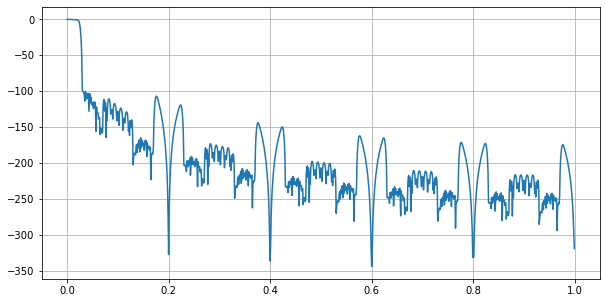

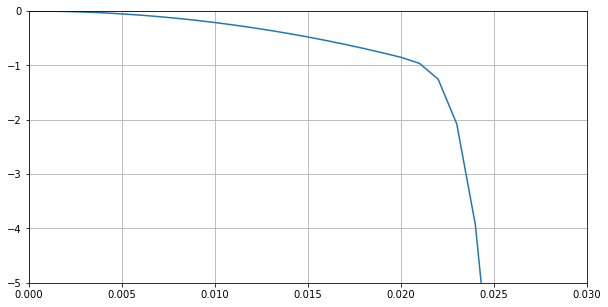

In [78]:
# fir 1 and 2 and cic and ratechange of 10
n = 6
r = 10
h_cic = 1
for i in range(n):
    h_cic = np.convolve(np.ones(r), h_cic) * r**-1
(w, H_cic) = signal.freqz(h_cic, 1, 1000, fs=2)
H_01cic2 = []
for i in range(r//2):
    H_01cic2 = np.append(H_01cic2, [H_01[::10], H_01[::-10]])
H_01cic2 = H_cic * H_01cic2
plt.figure(0,(10,5))
plt.plot(w, 20 * np.log10(abs(H_01cic2)), label='cic')
plt.grid()
print(f'Stopband attenuation:\t{np.min(abs(20 * np.log10(abs(H_01cic2[50:]))))} dB')
print(f'Passband droop:\t{abs(H_01cic2[20])}\t{20 * np.log10(abs(H_01cic2[20]))} dB')
plt.figure(1,(10,5))
plt.plot(w, 20 * np.log10(abs(H_01cic2)), label='cic')
plt.ylim(-5, 0)
plt.xlim(0, 0.03)
plt.grid()